Accuracy of Decision Tree:  0.9428571428571428
Labels: [2 4]
Entropy: 0.455374886793117
Classification Error: 0.05714285714285716
Gini Index: 0.455374886793117


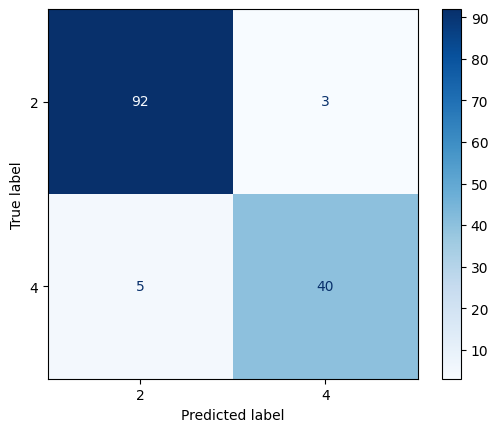

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Carregando o conjunto de dados breast cancer
breastCancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                           header=None, names=['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'])

# Substituindo dados inexistentes '?' pela moda em cada coluna (exceto 'Class')
for col in breastCancer.columns:
    if col != 'Class':
        mode = breastCancer[col][breastCancer[col] != '?'].mode().values[0]
        breastCancer[col] = breastCancer[col].replace('?', mode).astype(int)

# Removendo a coluna 'Sample code number' pois é um id e desnecessário
breastCancer = breastCancer.drop('Sample code number', axis=1)

# Dividindo os dados em atributos (X) e rótulos (y)
X = breastCancer.drop('Class', axis=1)
y = breastCancer['Class']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o classificador da Árvore de Decisão
dt_classifier = DecisionTreeClassifier()

# Treinando o classificador
dt_classifier.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
dt_predictions = dt_classifier.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, dt_predictions)

# Obtendo os rótulos e centróides dos clusters
centroids = dt_classifier.tree_.value.squeeze(axis=1)
labels = dt_classifier.classes_

# Calculando a entropia do modelo
entropy = dt_classifier.tree_.impurity[0]

# Calculando o erro de classificação
classification_error = 1 - accuracy

# Calculando o índice Gini
gini_index = dt_classifier.tree_.impurity[0]

# Calculando a matrix de confusão
cm = confusion_matrix(y_test, dt_predictions)

# Criando o gráfico ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Exibindo os resultados
print("Accuracy of Decision Tree: ", accuracy)
print("Labels:", labels)
print("Entropy:", entropy)
print("Classification Error:", classification_error)
print("Gini Index:", gini_index)

# Plotando o gráfico de confusão
cm_display.plot(cmap='Blues')